## Image Segmentation
Image Segmentation is the process by which a digital image is partitioned into various subgroups (of pixels) called Image Objects, which can reduce the complexity of the image, and thus analyzing the image becomes simpler.

we have the following techniques for image segmentation:
* Threshold Method
* Edge Based Segmentation
* Region Based Segmentation
* Clustering Based Segmentation
* Watershed Based Method
* Artificial Neural Network Based Segmentation

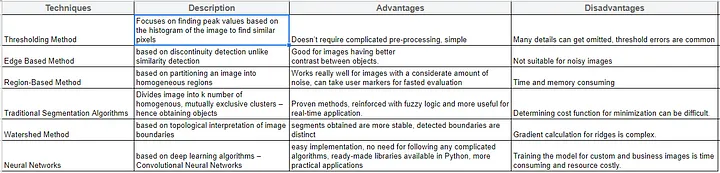

Segment images. Upload one notebook with all solutions.

- flowers.jpg
- gecko.png
- rice.tif
- beans.png
- blobs.png
- chips.png
- coffee.png
- dowels.tif

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flowers = cv2.imread("../../img/flowers.jpg")
gecko = cv2.imread("../../img/gecko.png")
rice = cv2.imread("../../img/rice.tif")
beans = cv2.imread("../../img/beans.png")
blobs = cv2.imread("../../img/blobs.png")
chips = cv2.imread("../../img/chips.png")
coffee = cv2.imread("../../img/coffee.png")
dowels = cv2.imread("../../img/dowels.tif")

# converte as imagens pra RGB
flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
gecko = cv2.cvtColor(gecko, cv2.COLOR_BGR2RGB)
rice = cv2.cvtColor(rice, cv2.COLOR_BGR2RGB)
beans = cv2.cvtColor(beans, cv2.COLOR_BGR2RGB)
blobs = cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB)
chips = cv2.cvtColor(chips, cv2.COLOR_BGR2RGB)
coffee = cv2.cvtColor(coffee, cv2.COLOR_BGR2RGB)
dowels = cv2.cvtColor(dowels, cv2.COLOR_BGR2RGB)

In [2]:
def segment_image(image: np.ndarray) -> np.ndarray:
    """
    Segmenta a imagem em regiões de cor semelhante usando o algoritmo de k-means.
    """

    # reshape a imagem para uma lista de pixels
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # define os critérios de parada e o número de clusters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 3

    # aplica o k-means
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # converte os centros de volta para uint8
    centers = np.uint8(centers)
    
    # substitui os rótulos pelos centros
    segmented_image = centers[labels.flatten()]
    
    # reshape a imagem segmentada de volta para a forma original
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

In [3]:
def plot_comparison(original: np.ndarray, segmented: np.ndarray) -> None:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Imagem Original")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented)
    plt.title("Imagem Segmentada")
    plt.axis("off")
    
    plt.show()

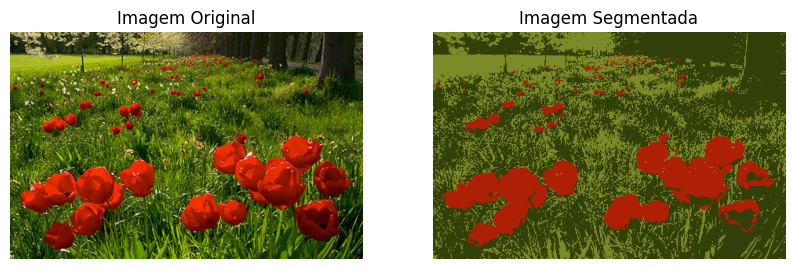

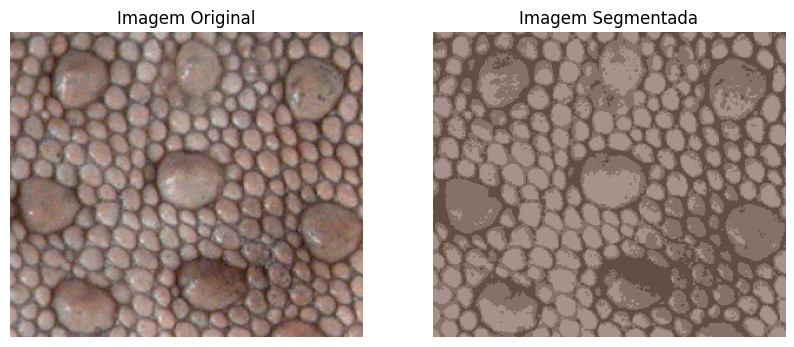

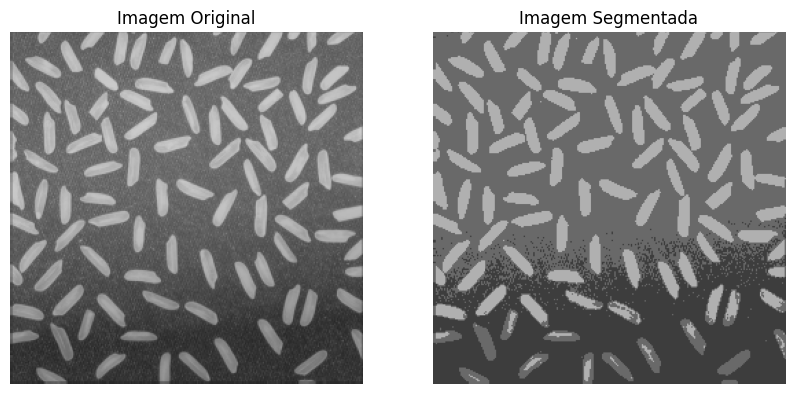

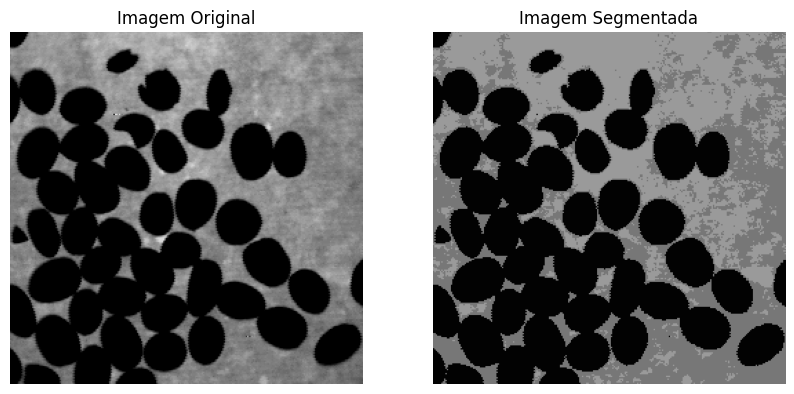

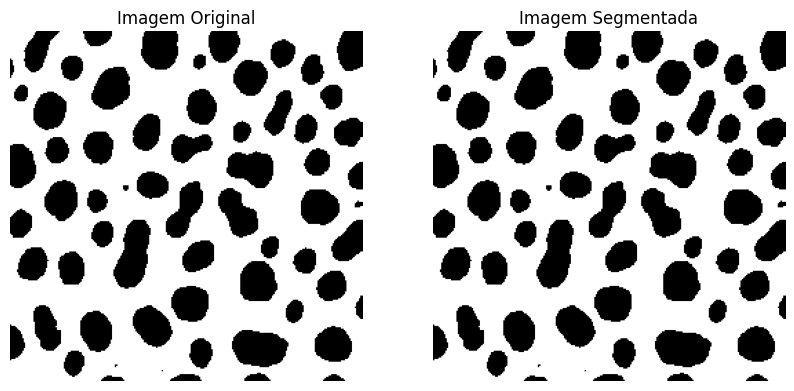

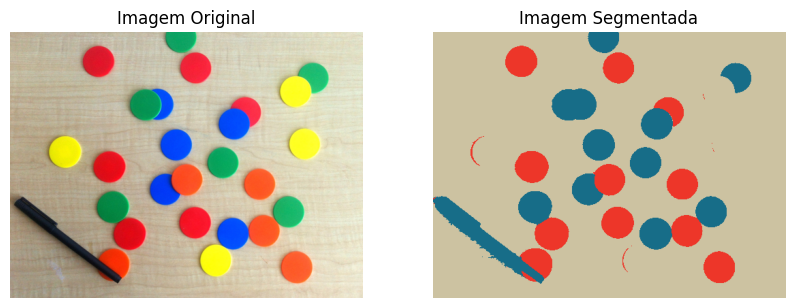

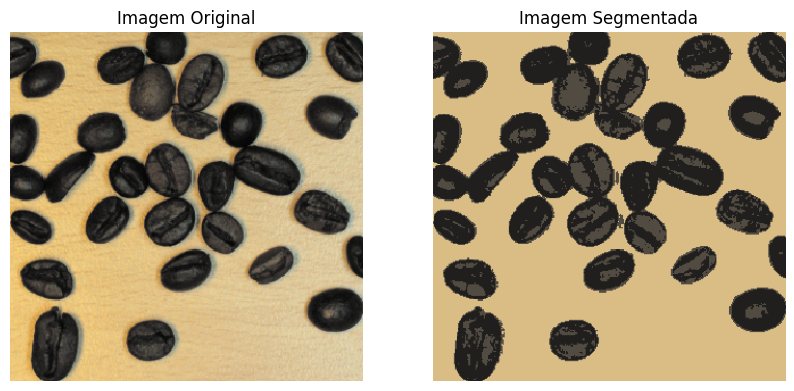

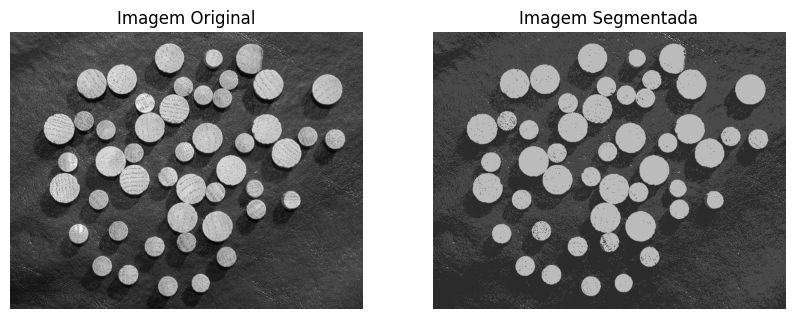

In [4]:
plot_comparison(flowers, segment_image(flowers))
plot_comparison(gecko, segment_image(gecko))
plot_comparison(rice, segment_image(rice))
plot_comparison(beans, segment_image(beans))
plot_comparison(blobs, segment_image(blobs))
plot_comparison(chips, segment_image(chips))
plot_comparison(coffee, segment_image(coffee))
plot_comparison(dowels, segment_image(dowels))